In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train[4]

9

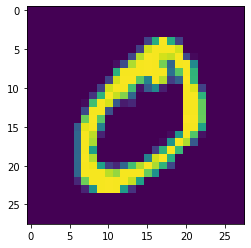

In [6]:

plt.imshow(X_train[1])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.1967 - accuracy: 0.9539 - val_loss: 0.0815 - val_accuracy: 0.9732
Epoch 2/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0930 - val_accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0778 - val_accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0326 - accuracy: 0.9891 - val_loss: 0.0946 - val_accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0895 - val_accuracy: 0.9792


In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.089480459690094, 0.979200005531311]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 96ms/step
[[5.5896190e-11 1.9871221e-15 3.6751852e-11 2.8618291e-10 2.0600143e-16
  1.3245833e-14 1.3910959e-18 1.0000000e+00 3.9342890e-11 5.7311269e-12]
 [3.0763520e-08 1.0124682e-09 9.9999976e-01 7.9521845e-10 9.4706606e-16
  4.7063792e-16 1.8000586e-07 7.8056426e-16 3.5389804e-09 6.1371052e-16]
 [2.8989250e-08 9.9993098e-01 1.2307514e-06 8.6834689e-10 1.1529957e-05
  1.9037734e-05 4.5915072e-10 5.7120793e-09 3.7229951e-05 1.7418557e-10]
 [1.0000000e+00 1.6080231e-16 3.8376722e-11 8.7405737e-16 9.5368265e-16
  1.8194812e-10 2.5628987e-12 5.0564428e-14 7.5182655e-12 3.8479647e-10]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
model.save("model.h5")

In [17]:
model=load_model("model.h5")